In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

**A. EDA**

Q1. Demonstrate the following pre-processing activities: Indexing, missing value manipulation, concat, append, merge and join, aggregation, grouping, transform, apply, and pivot tables.

In [ ]:
brate = pd.read_csv('/content/sample_data/NCHS_-_Natality_Measures_for_Females_by_Race_and_Hispanic_Origin__United_States.csv')
brate

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,All races,4257850,23.7,118.0
1,1960,American Indian or Alaska Native,21114,NaN,NaN
2,1960,Black,602264,31.9,153.5
3,1960,White,3600744,22.7,113.2
4,1961,All races,4268326,23.3,117.1
...,...,...,...,...,...
465,2017,"Non-Hispanic, Single Race Asian",249250,13.8,58.0
466,2016,"Non-Hispanic, Single Race Asian",254471,14.6,61.1
467,2018,"Non-Hispanic, Single Race Native Hawaiian or P...",9476,16.6,73.0
468,2017,"Non-Hispanic, Single Race Native Hawaiian or P...",9426,16.7,72.8


In [ ]:
brate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            470 non-null    int64  
 1   Race            470 non-null    object 
 2   Live Births     470 non-null    int64  
 3   Birth Rate      447 non-null    float64
 4   Fertility Rate  447 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 18.5+ KB


In [ ]:
brate.describe()

,Year,Live Births,Birth Rate,Fertility Rate
count,470.000000,4.700000e+02,447.000000,447.000000
mean,1996.276596,1.490335e+06,15.975839,69.571141
std,15.692545,1.529928e+06,3.765979,15.259029
min,1960.000000,9.342000e+03,8.900000,40.700000
25%,1987.000000,1.616592e+05,13.700000,61.800000
50%,1998.500000,6.230570e+05,15.100000,65.500000
75%,2009.000000,3.071809e+06,17.700000,72.450000
max,2018.000000,4.316233e+06,31.900000,153.500000


Indexing

In [ ]:
#selecting rows with Live Births > 10000
birth_r100 = brate[brate['Live Births']>= 10000]
birth_r100.head()

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,All races,4257850,23.7,118.0
1,1960,American Indian or Alaska Native,21114,NaN,NaN
2,1960,Black,602264,31.9,153.5
3,1960,White,3600744,22.7,113.2
4,1961,All races,4268326,23.3,117.1


In [ ]:
#using loc for indexing for selected rows
birthloc = brate.set_index('Year')

In [ ]:
#select rows with year = 1989
birthloc1989 = birthloc.loc[1989]
birthloc1989

,Race,Live Births,Birth Rate,Fertility Rate
Year,,,,
1989,All races,4040958,16.4,69.2
1989,American Indian or Alaska Native,39478,19.7,79.0
1989,Asian or Pacific Islander,133075,18.7,68.2
1989,Black,673124,22.3,86.2
1989,White,3192355,15.4,66.4
1989,All origins,4040958,16.4,69.2
1989,American Indian or Alaska Native,39478,19.7,79.0
1989,Asian or Pacific Islander,133075,18.7,68.2
1989,Hispanic Total,532249,26.2,104.9


In [ ]:
##select rows with year = 1990 and 2000 for only Hispanic Origin column
birthlocyear = birthloc.loc[[1990,2000], ['Race']]
birthlocyear

,Race
Year,
1990,All races
1990,American Indian or Alaska Native
1990,Asian or Pacific Islander
1990,Black
1990,White
1990,All origins
1990,American Indian or Alaska Native
1990,Asian or Pacific Islander
1990,Hispanic Total


In [ ]:
#using iloc for indexing
birthiloc = brate.iloc[7:19,[2,3]]
birthiloc

,Live Births,Birth Rate
7,3600864,22.2
8,4167362,22.4
9,21968,NaN
10,584610,NaN
11,3394068,21.4
12,4098020,21.7
13,22358,NaN
14,580658,NaN
15,3326344,20.7
16,4027490,21.1


Missing Value Manipulation

In [ ]:
brate.isna().sum()

Year               0
Race               0
Live Births        0
Birth Rate        23
Fertility Rate    23
dtype: int64

In [ ]:
brate.isnull().sum()

Year               0
Race               0
Live Births        0
Birth Rate        23
Fertility Rate    23
dtype: int64

In [ ]:
brate['Birth Rate'] = brate['Birth Rate'].replace(np.nan, 15.975839)
brate['Fertility Rate'] = brate['Fertility Rate'].replace(np.nan,69.571141)

In [ ]:
brate.isna().sum()

Year              0
Race              0
Live Births       0
Birth Rate        0
Fertility Rate    0
dtype: int64

In [ ]:
brate.isnull().sum()

Year              0
Race              0
Live Births       0
Birth Rate        0
Fertility Rate    0
dtype: int64

Merging, Concatinating, Appending and Joining

In [ ]:
#split the dataset into multiple datasets to concat them

b1 = brate.iloc[:45,:]
b2 = brate.iloc[45:145,:]
b3 = brate.iloc[145:,:]

In [ ]:
b1.head()

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,All races,4257850,23.700000,118.000000
1,1960,American Indian or Alaska Native,21114,15.975839,69.571141
2,1960,Black,602264,31.900000,153.500000
3,1960,White,3600744,22.700000,113.200000
4,1961,All races,4268326,23.300000,117.100000


In [ ]:
b2.head()

,Year,Race,Live Births,Birth Rate,Fertility Rate
45,1971,American Indian or Alaska Native,27148,15.975839,69.571141
46,1971,Black,564960,24.400000,109.700000
47,1971,White,2919746,16.100000,77.300000
48,1972,All races,3258411,15.600000,73.100000
49,1972,American Indian or Alaska Native,27368,15.975839,69.571141


In [ ]:
b3.head()

,Year,Race,Live Births,Birth Rate,Fertility Rate
145,1990,Non-Hispanic Black,661701,23.0,89.0
146,1990,Non-Hispanic White,2626500,14.4,62.8
147,1991,All races,4110907,16.2,69.3
148,1991,American Indian or Alaska Native,38841,18.3,73.9
149,1991,Asian or Pacific Islander,145372,18.3,67.1


In [ ]:
#concatinating
concatb = pd.concat([b3,b1,b2])
concatb.head(10).tail(10)

,Year,Race,Live Births,Birth Rate,Fertility Rate
145,1990,Non-Hispanic Black,661701,23.0,89.0
146,1990,Non-Hispanic White,2626500,14.4,62.8
147,1991,All races,4110907,16.2,69.3
148,1991,American Indian or Alaska Native,38841,18.3,73.9
149,1991,Asian or Pacific Islander,145372,18.3,67.1
150,1991,Black,682602,21.8,84.8
151,1991,White,3241273,15.3,66.7
152,1991,All origins,4110907,16.2,69.3
153,1991,American Indian or Alaska Native,38841,18.3,73.9
154,1991,Asian or Pacific Islander,145372,18.3,67.1


In [ ]:
papp = b1.append(b3)
ap = papp.append(b2)

In [ ]:
ap

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,All races,4257850,23.700000,118.000000
1,1960,American Indian or Alaska Native,21114,15.975839,69.571141
2,1960,Black,602264,31.900000,153.500000
3,1960,White,3600744,22.700000,113.200000
4,1961,All races,4268326,23.300000,117.100000
...,...,...,...,...,...
140,1990,White,3290273,15.800000,68.300000
141,1990,All origins,4158212,16.700000,70.900000
142,1990,American Indian or Alaska Native,39051,18.900000,76.200000
143,1990,Asian or Pacific Islander,141635,19.000000,69.600000


In [ ]:
#merging 2 dfs

br1  = brate[['Year','Race','Live Births']]
br2 = brate[['Live Births','Fertility Rate']]

In [ ]:
br1.head()

,Year,Race,Live Births
0,1960,All races,4257850
1,1960,American Indian or Alaska Native,21114
2,1960,Black,602264
3,1960,White,3600744
4,1961,All races,4268326


In [ ]:
br2.head()

,Live Births,Fertility Rate
0,4257850,118.000000
1,21114,69.571141
2,602264,153.500000
3,3600744,113.200000
4,4268326,117.100000


In [ ]:
mergeb = pd.merge(br1,br2,how='left',left_on='Live Births',right_on='Live Births')
mergeb

,Year,Race,Live Births,Fertility Rate
0,1960,All races,4257850,118.000000
1,1960,American Indian or Alaska Native,21114,69.571141
2,1960,Black,602264,153.500000
3,1960,White,3600744,113.200000
4,1961,All races,4268326,117.100000
...,...,...,...,...
645,2017,"Non-Hispanic, Single Race Asian",249250,58.000000
646,2016,"Non-Hispanic, Single Race Asian",254471,61.100000
647,2018,"Non-Hispanic, Single Race Native Hawaiian or P...",9476,73.000000
648,2017,"Non-Hispanic, Single Race Native Hawaiian or P...",9426,72.800000


In [ ]:
#joining
joinb = br1.join(br2,lsuffix='1',rsuffix='2',how='inner')

In [ ]:
joinb.shape

(470, 5)

In [ ]:
joinb.head()

,Year,Race,Live Births1,Live Births2,Fertility Rate
0,1960,All races,4257850,4257850,118.000000
1,1960,American Indian or Alaska Native,21114,21114,69.571141
2,1960,Black,602264,602264,153.500000
3,1960,White,3600744,3600744,113.200000
4,1961,All races,4268326,4268326,117.100000


In [ ]:
brate.aggregate({'Year':['sum','max','min','mean','std'],
                 'Birth Rate':['sum','max','min','mean','std'],
                 'Fertility Rate':['sum','max','min','mean','std']})

,Year,Birth Rate,Fertility Rate
sum,938250.000000,7508.644297,32698.436243
max,2018.000000,31.900000,153.500000
min,1960.000000,8.900000,40.700000
mean,1996.276596,15.975839,69.571141
std,15.692545,3.672476,14.880171


In [ ]:
#grouping
bg = brate.groupby('Race')
bg

In [ ]:
avgg = bg.mean(['Birth Rate'])
avgg

,Year,Live Births,Birth Rate,Fertility Rate
Race,,,,
All origins,2003.500000,4.023522e+06,13.970000,65.290000
All races,1989.000000,3.835410e+06,15.593220,72.425424
American Indian or Alaska Native,1993.887640,3.798537e+04,14.602436,61.784526
Asian or Pacific Islander,2000.956522,2.017343e+05,16.410145,63.673913
Black,1989.000000,6.019997e+05,19.475043,82.857855
Hispanic Total,2003.500000,8.349245e+05,21.540000,90.203333
Non-Hispanic Black,2003.500000,6.014337e+05,16.976667,70.963333
Non-Hispanic White,2003.500000,2.297349e+06,11.846667,58.853333
"Non-Hispanic, Single Race American Indian or Alaska Native",2017.000000,3.016700e+04,12.700000,59.966667


In [ ]:
avgg[['Birth Rate']]

,Birth Rate
Race,
All origins,13.970000
All races,15.593220
American Indian or Alaska Native,14.602436
Asian or Pacific Islander,16.410145
Black,19.475043
Hispanic Total,21.540000
Non-Hispanic Black,16.976667
Non-Hispanic White,11.846667
"Non-Hispanic, Single Race American Indian or Alaska Native",12.700000


In [ ]:
#transform
transb= brate[['Year','Birth Rate','Fertility Rate']]
transb.head()

,Year,Birth Rate,Fertility Rate
0,1960,23.700000,118.000000
1,1960,15.975839,69.571141
2,1960,31.900000,153.500000
3,1960,22.700000,113.200000
4,1961,23.300000,117.100000


In [ ]:
transb.transform(func=['sqrt','exp',lambda x:x/2])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Year               Birth Rate                          \
          sqrt  exp <lambda>       sqrt           exp  <lambda>   
0    44.271887  inf    980.0   4.868265  1.962362e+10  11.85000   
1    44.271887  inf    980.0   3.996979  8.673986e+06   7.98792   
2    44.271887  inf    980.0   5.648008  7.144864e+13  15.95000   
3    44.271887  inf    980.0   4.764452  7.219128e+09  11.35000   
4    44.283180  inf    980.5   4.827007  1.315411e+10  11.65000   
..         ...  ...      ...        ...           ...       ...   
465  44.911023  inf   1008.5   3.714835  9.846091e+05   6.90000   
466  44.899889  inf   1008.0   3.820995  2.191288e+06   7.30000   
467  44.922155  inf   1009.0   4.074310  1.619155e+07   8.30000   
468  44.911023  inf   1008.5   4.086563  1.789443e+07   8.35000   
469  44.899889  inf   1008.0   4.098780  1.977640e+07   8.40000   

    Fertility Rate                          
              sqrt           exp  <lambda>  
0        10.862780  1.765017e+51  59.00000  
1         8.340932  1.638184e+30  34.78557  
2        12.389512  4.615332e+66  76.75000  
3        10.639549  1.452564e+49  56.60000  
4        10.821275  7.176023e+50  58.55000  
..             ...           ...       ...  
465       7.615773  1.545539e+25  29.00000  
466       7.816649  3.430780e+26  30.55000  
467       8.544004  5.052394e+31  36.50000  
468       8.532292  4.136550e+31  36.40000  
469       8.538150  4.571595e+31  36.45000  

[470 rows x 9 columns]

In [ ]:
def sumcal(x):
  return x.sum()
apx = transb.apply(sumcal)

In [ ]:
appb = pd.DataFrame(apx)
appb.columns=['Feature Sum']
appb

,Feature Sum
Year,938250.000000
Birth Rate,7508.644297
Fertility Rate,32698.436243


In [ ]:
#Pivot Tables

pt = pd.pivot_table(brate, aggfunc=np.mean, index=['Race'],columns=['Year'],values='Fertility Rate')

In [ ]:
pt.head()
#unclear pivot table

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Race,,,,,,,,,,,,,,,,,,,,,
All origins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.2,64.1,63.2,63.0,62.5,62.9,62.5,62.0,60.3,59.1
All races,118.000000,117.100000,112.000000,108.300000,104.700000,96.300000,90.800000,87.200000,85.200000,86.100000,...,66.2,64.1,63.2,63.0,62.5,62.9,62.5,62.0,60.3,59.1
American Indian or Alaska Native,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,...,51.6,48.6,47.7,47.0,46.4,44.8,43.9,42.8,40.8,40.7
Asian or Pacific Islander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.3,59.2,59.9,62.2,59.2,60.7,58.5,59.3,62.1,55.2
Black,153.500000,69.571141,69.571141,69.571141,142.600000,133.200000,124.700000,118.500000,112.700000,112.100000,...,68.8,66.3,65.5,65.1,64.7,64.6,64.0,65.1,64.9,62.2


In [ ]:
pt.replace(np.nan, 68.563)

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Race,,,,,,,,,,,,,,,,,,,,,
All origins,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,66.200,64.100,63.200,63.000,62.500,62.900,62.500,62.0,60.3,59.1
All races,118.000000,117.100000,112.000000,108.300000,104.700000,96.300000,90.800000,87.200000,85.200000,86.100000,...,66.200,64.100,63.200,63.000,62.500,62.900,62.500,62.0,60.3,59.1
American Indian or Alaska Native,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,69.571141,...,51.600,48.600,47.700,47.000,46.400,44.800,43.900,42.8,40.8,40.7
Asian or Pacific Islander,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,61.300,59.200,59.900,62.200,59.200,60.700,58.500,59.3,62.1,55.2
Black,153.500000,69.571141,69.571141,69.571141,142.600000,133.200000,124.700000,118.500000,112.700000,112.100000,...,68.800,66.300,65.500,65.100,64.700,64.600,64.000,65.1,64.9,62.2
Hispanic Total,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,86.500,80.200,76.200,74.400,72.900,72.100,71.700,70.6,67.6,65.9
Non-Hispanic Black,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,68.900,66.600,65.400,65.000,64.600,64.500,64.100,63.3,63.2,62.1
Non-Hispanic White,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,59.600,58.700,58.700,58.600,58.700,59.500,59.300,58.8,57.1,56.2
"Non-Hispanic, Single Race American Indian or Alaska Native",68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,68.563000,...,68.563,68.563,68.563,68.563,68.563,68.563,68.563,62.7,59.5,57.7


**Time Series**

Q2. Demonstrate the following functions: 


    • Index by time
    • Resample, shifting and windowing
    • Time-shifts (shift() and tshift()
    • Rolling windows
    • Visualize the data

In [ ]:
bike = pd.read_csv('/content/sample_data/seattle bicycle counts.csv')
bike

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0
...,...,...,...,...
62035,2019-10-31T19:00:00.000,111.0,44.0,67.0
62036,2019-10-31T20:00:00.000,52.0,17.0,35.0
62037,2019-10-31T21:00:00.000,41.0,16.0,25.0
62038,2019-10-31T22:00:00.000,32.0,14.0,18.0


In [ ]:
bike['Date'] = pd.to_datetime(bike['Date'])
bike.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
bike.index = bike['Date']

In [ ]:
bike.drop(columns='Date',inplace=True)

In [ ]:
bike.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
bike.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

In [ ]:
bike['Fremont Bridge East Sidewalk']

Date
2012-10-03 00:00:00     4.0
2012-10-03 01:00:00     4.0
2012-10-03 02:00:00     1.0
2012-10-03 03:00:00     2.0
2012-10-03 04:00:00     6.0
                       ... 
2019-10-31 19:00:00    44.0
2019-10-31 20:00:00    17.0
2019-10-31 21:00:00    16.0
2019-10-31 22:00:00    14.0
2019-10-31 23:00:00     6.0
Name: Fremont Bridge East Sidewalk, Length: 62040, dtype: float64

In [ ]:
bike_resampled = bike[['Fremont Bridge Total','Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].resample('M').mean()

In [ ]:
#Resample, shifting and windowing
bike_resampled

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2019-06-30,184.044444,72.188889,111.855556
2019-07-31,185.099462,71.459677,113.639785
2019-08-31,191.416667,70.483871,120.932796


In [ ]:
#Time-shifts (shift() and tshift()
#Resample, shifting and windowing
bike.shift(5)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2019-10-31 19:00:00,120.0,38.0,82.0
2019-10-31 20:00:00,199.0,56.0,143.0
2019-10-31 21:00:00,496.0,94.0,402.0


In [ ]:
#Rolling Window
bike.rolling(window=3).mean()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,8.333333,3.000000,5.333333
2012-10-03 03:00:00,5.666667,2.333333,3.333333
2012-10-03 04:00:00,4.666667,3.000000,1.666667
...,...,...,...
2019-10-31 19:00:00,336.000000,81.666667,254.333333
2019-10-31 20:00:00,156.000000,46.000000,110.000000
2019-10-31 21:00:00,68.000000,25.666667,42.333333


In [ ]:
#Time-shifts (shift() and tshift()
bike[['Fremont Bridge Total','Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].tshift(periods=6,axis=0,freq='D')

<ipython-input-52-20b3275c0136>:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  bike[['Fremont Bridge Total','Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].tshift(periods=6,axis=0,freq='D')


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-09 00:00:00,13.0,4.0,9.0
2012-10-09 01:00:00,10.0,4.0,6.0
2012-10-09 02:00:00,2.0,1.0,1.0
2012-10-09 03:00:00,5.0,2.0,3.0
2012-10-09 04:00:00,7.0,6.0,1.0
...,...,...,...
2019-11-06 19:00:00,111.0,44.0,67.0
2019-11-06 20:00:00,52.0,17.0,35.0
2019-11-06 21:00:00,41.0,16.0,25.0


In [ ]:
bike.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<Figure size 720x720 with 0 Axes>

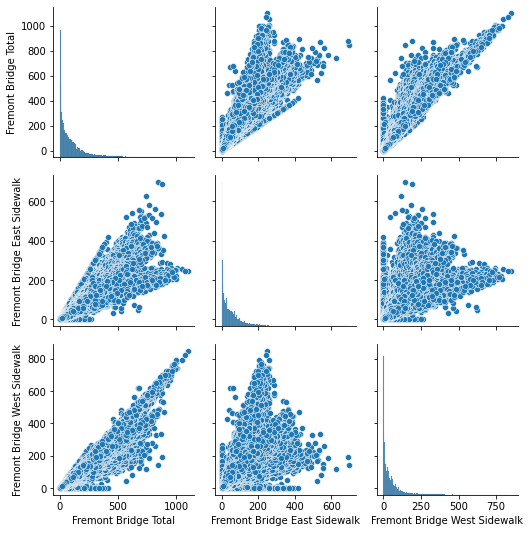

In [ ]:
#Visualisation
plt.figure(figsize=(10,10))
sns.pairplot(bike)
plt.show()

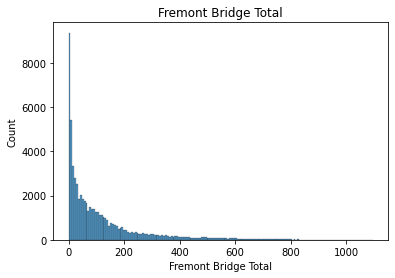

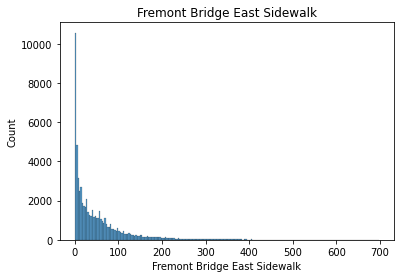

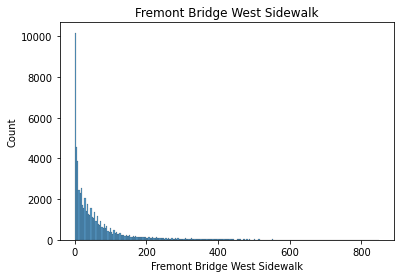

In [ ]:
for _ in bike.columns[:]:
  sns.histplot(bike[_])
  plt.title(_)
  plt.show()

From the histograms, we can infer that all the three columns of the dataset are positively (Right) skewed.

Q3. Demonstrate the following pre-processing activities:
 
    • Indexing, Selection, Subsetting
    • Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data
    • Time Zone Localization and Conversion
    • Periods and Period Arithmetic
    • Period Frequency Conversion
    • Resampling and Frequency Conversion
    • Downsampling and Upsampling
    • Moving Window Functions
    • Exponentially Weighted Functions

*Indexing, Selection, Subsetting*

In [ ]:
stock = pd.read_csv('/content/sample_data/stock_px_2.csv')
stock.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
stock.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
stock.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
stock.set_index('Date',inplace=True)
stock.head()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
substock = stock.iloc[:500]
substock

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2004-12-20 00:00:00,31.36,23.88,44.29,1194.65
2004-12-21 00:00:00,31.84,23.99,44.83,1205.45
2004-12-22 00:00:00,31.88,23.90,44.49,1209.57


In [ ]:
substock.loc['2003-01-08 00:00:00']

AAPL      7.28
MSFT     21.31
XOM      28.83
SPX     909.93
Name: 2003-01-08 00:00:00, dtype: float64

In [ ]:
substock[substock['MSFT']<50]

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2004-12-20 00:00:00,31.36,23.88,44.29,1194.65
2004-12-21 00:00:00,31.84,23.99,44.83,1205.45
2004-12-22 00:00:00,31.88,23.90,44.49,1209.57


*Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data*

In [ ]:
substock.index = pd.to_datetime(substock.index)

In [ ]:
substock.groupby(substock.index.year).count()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003,252,252,252,252
2004,248,248,248,248


In [ ]:
substock.shift(3)
#Lagging

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,7.40,21.11,29.22,909.03
2003-01-08,7.45,21.14,29.24,908.59
...,...,...,...,...
2004-12-20,32.63,24.03,43.81,1205.72
2004-12-21,33.30,24.07,43.46,1203.21
2004-12-22,32.49,23.89,43.20,1194.20


In [ ]:
substock.shift(-3)
#Leading

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,7.43,21.93,28.95,922.93
2003-01-03,7.28,21.31,28.83,909.93
2003-01-06,7.34,21.93,29.44,927.57
2003-01-07,7.36,21.97,29.03,927.57
2003-01-08,7.32,22.16,28.91,926.26
...,...,...,...,...
2004-12-20,32.01,23.94,45.08,1210.13
2004-12-21,31.58,23.79,44.13,1204.92
2004-12-22,NaN,NaN,NaN,NaN


In [ ]:
substock.rolling(5).mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,7.402,21.402,29.240,915.898
...,...,...,...,...
2004-12-20,32.486,24.000,43.740,1200.232
2004-12-21,32.324,23.972,43.918,1200.646
2004-12-22,32.174,23.946,44.054,1201.416


In [ ]:
substock.rolling(5,min_periods=5).count()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,5.0,5.0,5.0,5.0
...,...,...,...,...
2004-12-20,5.0,5.0,5.0,5.0
2004-12-21,5.0,5.0,5.0,5.0
2004-12-22,5.0,5.0,5.0,5.0


In [ ]:
substock.resample('Y').mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-12-31,9.272619,20.595119,30.211111,965.227540
2004-12-31,17.530605,21.819315,38.787339,1129.319355


In [ ]:
substock.resample('30T').mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-02 00:30:00,NaN,NaN,NaN,NaN
2003-01-02 01:00:00,NaN,NaN,NaN,NaN
2003-01-02 01:30:00,NaN,NaN,NaN,NaN
2003-01-02 02:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2004-12-26 22:00:00,NaN,NaN,NaN,NaN
2004-12-26 22:30:00,NaN,NaN,NaN,NaN
2004-12-26 23:00:00,NaN,NaN,NaN,NaN


In [ ]:
substock.rolling(6).mean()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2004-12-20,32.481667,24.025000,43.775000,1199.973333
2004-12-21,32.378333,23.998333,43.921667,1201.101667
2004-12-22,32.250000,23.960000,44.013333,1202.133333


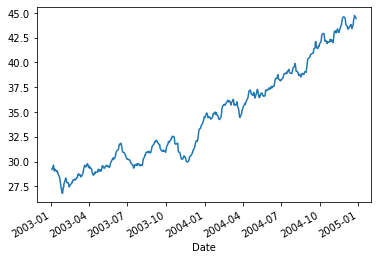

In [ ]:
substock['XOM'].ewm(alpha=0.5).mean().plot()

**Classifier**

Q4. Consider the Chronic Kidney Disease (CKD) data. Prepare a classifier model as stated above.  Given that a new patient Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD.

In [ ]:
ckd = pd.read_csv('/content/sample_data/ckd.csv')

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
ckd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
ckd.shape

(400, 26)

In [ ]:
ckd = ckd[['hemo','bgr','classification']]

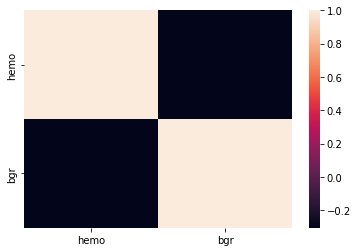

In [ ]:
ckdcor = ckd.corr()
sns.heatmap(ckdcor)

In [ ]:
ckd.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

*Data Preprocessing*

In [ ]:
ckd.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [ ]:
ckd.fillna(method='bfill',inplace=True)
ckd.isna().sum()

hemo              0
bgr               0
classification    0
dtype: int64

In [ ]:
ckd.shape

(400, 3)

In [ ]:
ckd.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [ ]:
classification = np.array(ckd['classification'])

In [ ]:
for i in range(len(classification)):
  if classification[i]== 'ckd\t':
    classification[i]='ckd'

In [ ]:
ckd['classification']=classification

In [ ]:
ckd.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
le = LabelEncoder()
mms = MinMaxScaler()

In [ ]:
ckd['classification'] = le.fit_transform(ckd['classification']) 

In [ ]:
cls = ckd.columns

In [ ]:
for i in cls:
  ckd[i] = mms.fit_transform(ckd[[i]])

In [ ]:
ckd.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,0.631871,0.268344,0.375000
std,0.194916,0.169754,0.484729
min,0.000000,0.000000,0.000000
25%,0.496599,0.164530,0.000000
50%,0.639456,0.209402,0.000000
75%,0.795918,0.302350,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = ckd.pop('classification')
x = ckd

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
dt = DecisionTreeClassifier(random_state=0,max_leaf_nodes=5,min_samples_leaf=27)
kn = KNeighborsClassifier(n_neighbors=9)
nb = GaussianNB()

In [ ]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=27, random_state=0)

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
ypkn = kn.predict(x_test)
ypdt = dt.predict(x_test)
ypnb = nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
acckn = accuracy_score(y_test,ypkn)
print(f'Accuracy of KNN Classifier : {acckn}')

Accuracy of KNN Classifier : 0.9666666666666667


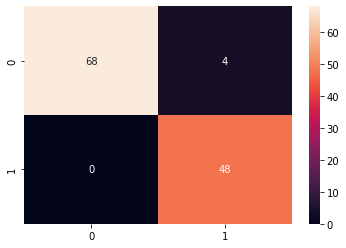

In [ ]:
cmkn = confusion_matrix(y_test,ypkn)
sns.heatmap(cmkn,cbar=True,annot=True)

In [ ]:
print('The confusion matrix of KNN Classifier is : ')
cmkn

The confusion matrix of KNN Classifier is : 


array([[68,  4],
       [ 0, 48]])

In [ ]:
accdt = accuracy_score(y_test,ypdt)
print(f'Accuracy of Decision Tree Classifier : {accdt}')

Accuracy of Decision Tree Classifier : 0.9416666666666667


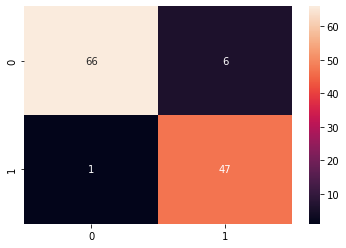

In [ ]:
cmdt = confusion_matrix(y_test,ypdt)
sns.heatmap(cmdt,cbar=True,annot=True)

In [ ]:
print('The confusion matrix of Decision Tree Classifier is : ')
cmdt

The confusion matrix of Decision Tree Classifier is : 


array([[66,  6],
       [ 1, 47]])

In [ ]:
accnb = accuracy_score(y_test,ypnb)
print(f'Accuracy of Naive Bayes Classifier : {accnb}')

Accuracy of Naive Bayes Classifier : 0.9416666666666667


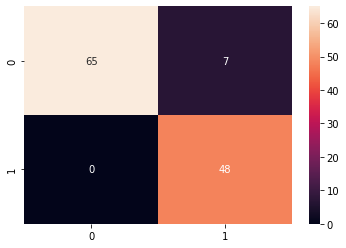

In [ ]:
cmnb = confusion_matrix(y_test,ypnb)
sns.heatmap(cmnb,cbar=True,annot=True)

In [ ]:
print('The confusion matrix of Naive Bayes Classifier is : ')
cmnb

The confusion matrix of Naive Bayes Classifier is : 


array([[65,  7],
       [ 0, 48]])

Kat has Haemoglobin 0 and Glucose levels 1.8. Find if Kat is likely to have Chroic Kidney Disease

In [ ]:
hemo = np.array(ckd['hemo'])
gluc = np.array(ckd['bgr'])

In [ ]:
sh = np.std(hemo)
gh = np.std(gluc)
sm = np.mean(hemo)
gm = np.mean(gluc)

In [ ]:
kath = (0*sh)+sm
katg = (1.8*gh)+gm
kat = pd.DataFrame({
    'hemo':[kath],
    'bgr':[katg]
})
kat

,hemo,bgr
0,0.631871,0.573519


In [ ]:
kat_knn = kn.predict(kat)
kat_dtc = dt.predict(kat)
kat_nb = nb.predict(kat)

In [ ]:
print(f'Prediction of disease in KNN Classifier: {kat_knn}')
print(f'Prediction of disease in Descision Tree Classifier : {kat_dtc}')
print(f'Prediction of disease in Naive Bayes Classifier : {kat_nb}')

Prediction of disease in KNN Classifier: [0.]
Prediction of disease in Descision Tree Classifier : [0.]
Prediction of disease in Naive Bayes Classifier : [0.]


From the above predictions it is clear that Kat doesnot have tha disease beacuse all the predictions are 0.
##### So Kat doesnot have the disease

Q5. Prepare a  classifier model  for wine dataset – wine.csv.

In [ ]:
wine = pd.read_csv('/content/sample_data/Wine.csv')

In [ ]:
wine.shape

(178, 14)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
cls = wine.columns
len(cls)

14

In [ ]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
for i in cls[:12]:
    wine[i]= mms.fit_transform(wine[[i]])
wine['Customer_Segment']=le.fit_transform(wine[['Customer_Segment']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,746.893258,0.938202
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,314.907474,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,500.500000,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,673.500000,1.000000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,985.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1680.000000,2.000000


In [ ]:
wy = wine.pop('Customer_Segment')
wX = wine

In [ ]:
wy.unique()

array([0, 1, 2])

In [ ]:
X_wtrain,X_wtest,y_wtrain,y_wtest = train_test_split(wX,wy,test_size=0.2)

In [ ]:
kn.fit(X_wtrain,y_wtrain)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knw_pred = kn.predict(X_wtest)

In [ ]:
knw_acc = accuracy_score(y_wtest,knw_pred)
print(f'The accuuracy of the model is {knw_acc}')

The accuuracy of the model is 0.6388888888888888


In [ ]:
w_knnmat = confusion_matrix(y_wtest,knw_pred)

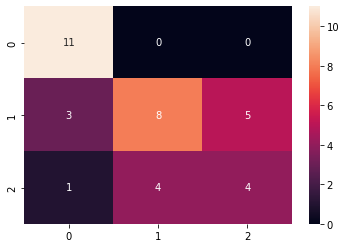

In [ ]:
sns.heatmap(w_knnmat,annot=True,cbar = True)

In [ ]:
print('Confusion matrix is : ')
w_knnmat

Confusion matrix is : 


array([[11,  0,  0],
       [ 3,  8,  5],
       [ 1,  4,  4]])

Q6-Prepare a classifier model for breast-cancer.csv  dataset.

In [ ]:
bc = pd.read_csv('/content/sample_data/breast cancer.csv')

In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
bc.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
bc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
bc.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [ ]:
bc.pop('Unnamed: 32')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [ ]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
bc.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
bc['diagnosis'] = le.fit_transform(bc[['diagnosis']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
bc.diagnosis.unique()

array([1, 0])

In [ ]:
y = bc.pop('diagnosis')
x = bc

In [ ]:
cls1 = x.columns
len(cls1)

32

In [ ]:
for i in cls1[:]:
  x[i] = mms.fit_transform(x[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
xb_train, xb_test, yb_train, yb_test = train_test_split(x,y,test_size=0.4)

In [ ]:
xb_train.shape

(341, 32)

In [ ]:
yb_train.shape

(341,)

D. Regression
Predicting a quantitative variable –Regression
Q7. Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [ ]:
home = pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
home.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
obj_colums = home.describe(include='object').columns

In [ ]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
for i in obj_colums:
    home[i]=le.fit_transform(home[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
for i in all_cols[1:]:
    home[i]=mms.fit_transform(home[[i]])

In [ ]:
yh= home.pop('price')
Xh = home

In [ ]:
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)

In [ ]:
Xh_train.shape

(436, 12)

In [ ]:
Xh_test.shape

(109, 12)

In [ ]:
yh_train.shape

(436,)

In [ ]:
yh_test.shape

(109,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor()

In [ ]:
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [ ]:
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


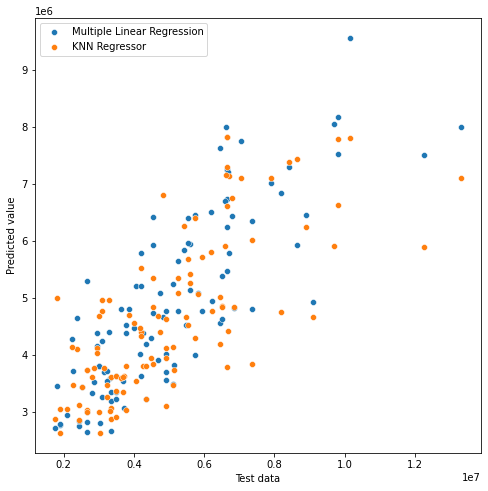

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


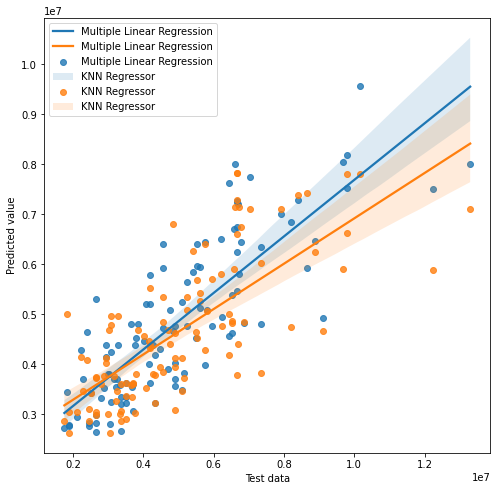

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


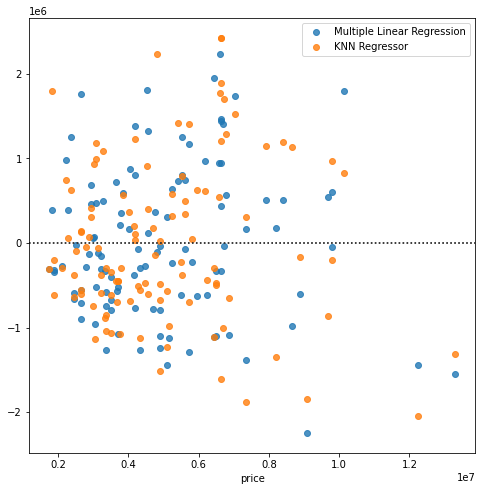

In [ ]:
plt.figure(figsize=(8,8))

sns.residplot(yh_test,home_pred,label='Multiple Linear Regression')

sns.residplot(yh_test,khome_pred,label='KNN Regressor')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [ ]:
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [ ]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,9.796797e+05,1.771751e+12,0.649475
KNN Regressor,1.107997e+06,2.531899e+12,0.499087


#### Comments : 

We can observe that MAE is better for KNN regressor but MSE and R2 score are better for Multiple Regression.

###### So in this case Multiple Regression is better

Q8. Implement a logistic regression model – employ scikit-learn library functions. 

In [ ]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [ ]:
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [ ]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [ ]:
titanic_df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14.4542,C,0
1305,3.0,female,NaN,1.0,0.0,14.4542,C,0
1306,3.0,male,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,male,27.0000,0.0,0.0,7.2250,C,0


In [ ]:
titanic_df['sex']=le.fit_transform(titanic_df[['sex']])
titanic_df['embarked']=le.fit_transform(titanic_df[['embarked']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for i in titanic_df.columns[:-1]:
    titanic_df[i]=mms.fit_transform(titanic_df[[i]])

In [ ]:
titanic_df.describe()

,pclass,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.647441,0.644003,0.372206,0.062357,0.042781,0.064988,0.498345
std,0.418918,0.478997,0.180545,0.130207,0.096173,0.101026,0.272043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.260960,0.000000,0.000000,0.015412,0.333333
50%,1.000000,1.000000,0.348643,0.000000,0.000000,0.028213,0.666667
75%,1.000000,1.000000,0.486430,0.125000,0.000000,0.061045,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
titanic_df['survived'].unique()

['1', '0']
Categories (2, object): ['0', '1']

In [ ]:
titanic_df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [ ]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]

In [ ]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age

<ipython-input-171-6d57e88afded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=avg_age


In [ ]:
titanic_df['age']=age

In [ ]:
titanic_df.dropna(inplace=True)

In [ ]:
yt= titanic_df.pop('survived')
Xt = titanic_df

In [ ]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt,yt,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
logr.fit(Xt_train,yt_train)

LogisticRegression()

In [ ]:
tita_pred = logr.predict(Xt_test)

In [ ]:
log_acc=accuracy_score(yt_test,tita_pred)
print(f'Accuracy of the model is {log_acc}')

Accuracy of the model is 0.767175572519084


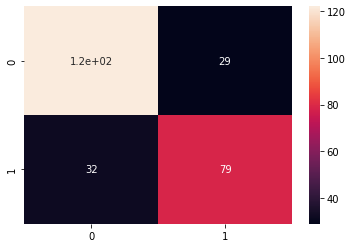

In [ ]:
log_conf = confusion_matrix(yt_test,tita_pred)
sns.heatmap(log_conf,annot=True,cbar=True)

In [ ]:
print('The confusion matrix is : ')
log_conf

The confusion matrix is : 


array([[122,  29],
       [ 32,  79]])